# رسم البيانات

In [39]:
# سنجرب رسم البيانات على بيانات موقع سوق البورصة السعودي
import pandas as pd
data=pd.read_csv('../saudi_stock_market_dataset.csv', encoding='utf8')
data.head()

,Unnamed: 0,الشركة,السهم,القطاع,آخر سعر,نسبة التغيير,آخر تحديث
0,0,سامبا,1090,البنوك,29.8,-1.16%,05 أغسطس 2019
1,1,السعودي الفرنسي,1050,البنوك,37.5,-3.47%,05 أغسطس 2019
2,2,الأول,1040,البنوك,19.58,1.45%,13 يونيو 2019
3,3,الجزيرة,1020,البنوك,14.74,-2.12%,05 أغسطس 2019
4,4,الرياض,1010,البنوك,25.05,-1.96%,05 أغسطس 2019


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 7 columns):
Unnamed: 0      536 non-null int64
الشركة          536 non-null object
السهم           536 non-null object
القطاع          536 non-null object
آخر سعر         536 non-null object
نسبة التغيير    536 non-null object
آخر تحديث       534 non-null object
dtypes: int64(1), object(6)
memory usage: 29.4+ KB


In [42]:
# نحول المتغيرات الرقمية لنوعها الصحيح
# المتغيرات هي: السهم، آخر سعر
data['السهم'] = pd.to_numeric(data['السهم'], errors='coerce')
data['آخر سعر'] = pd.to_numeric(data['آخر سعر'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 7 columns):
Unnamed: 0      536 non-null int64
الشركة          536 non-null object
السهم           512 non-null float64
القطاع          536 non-null object
آخر سعر         530 non-null float64
نسبة التغيير    536 non-null object
آخر تحديث       534 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 29.4+ KB


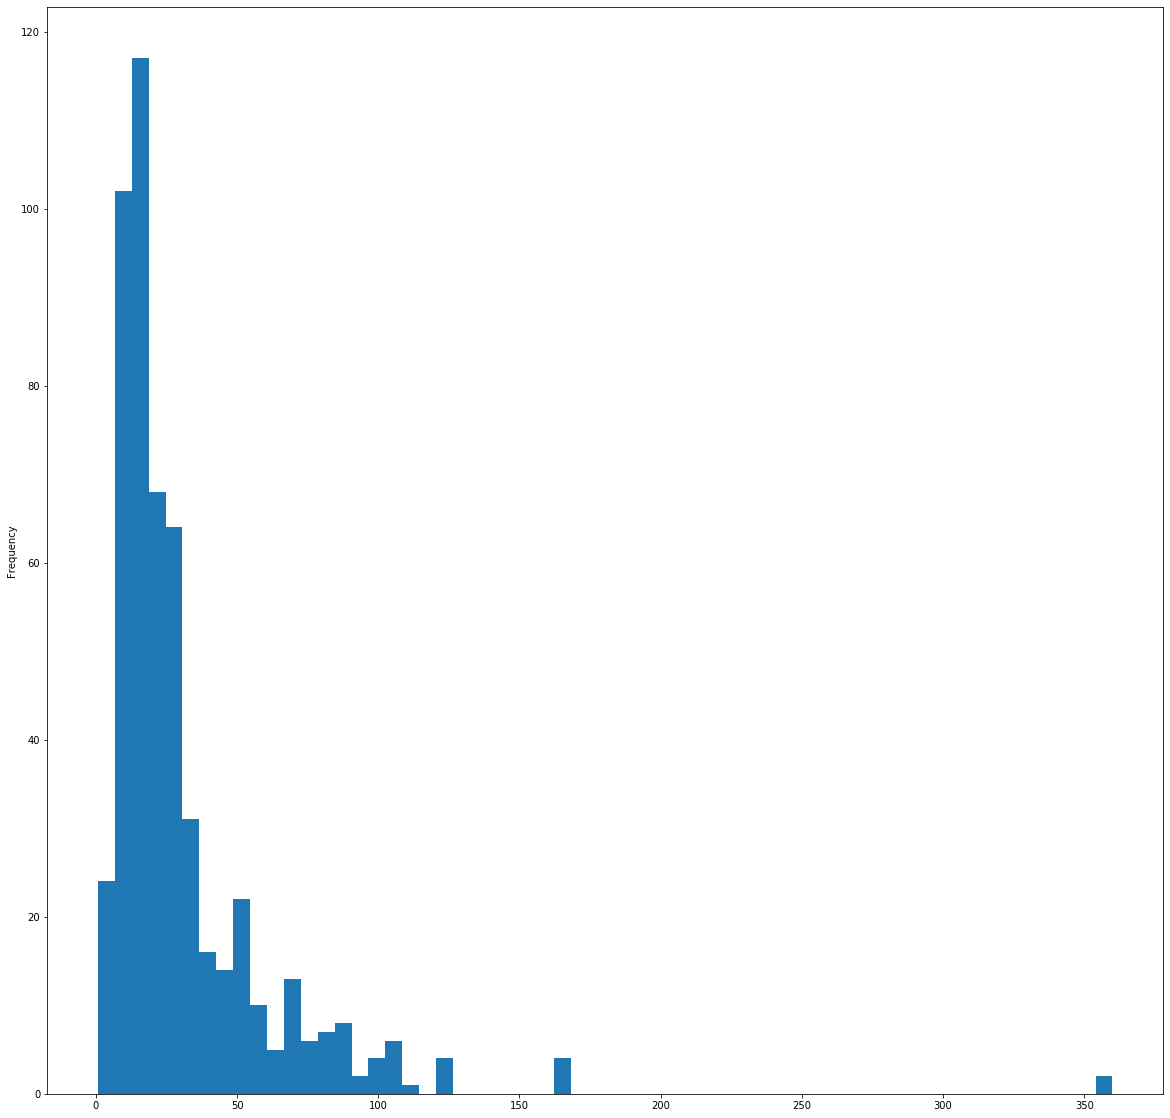

In [44]:
# لنرسم آخر سعر
data['آخر سعر'].plot.hist(bins=60)

In [30]:
# يمكننا ملاحظة أن البيانات شبه موزعة طبيعيا مع وجود قيمة شاذة نحو اليسار، سنقوم بالتعويض عن القيم المفقودة بالوسيط
import numpy as np
med = np.nanmedian(data['آخر سعر'])
data['آخر سعر'] = data['آخر سعر'].fillna(med)

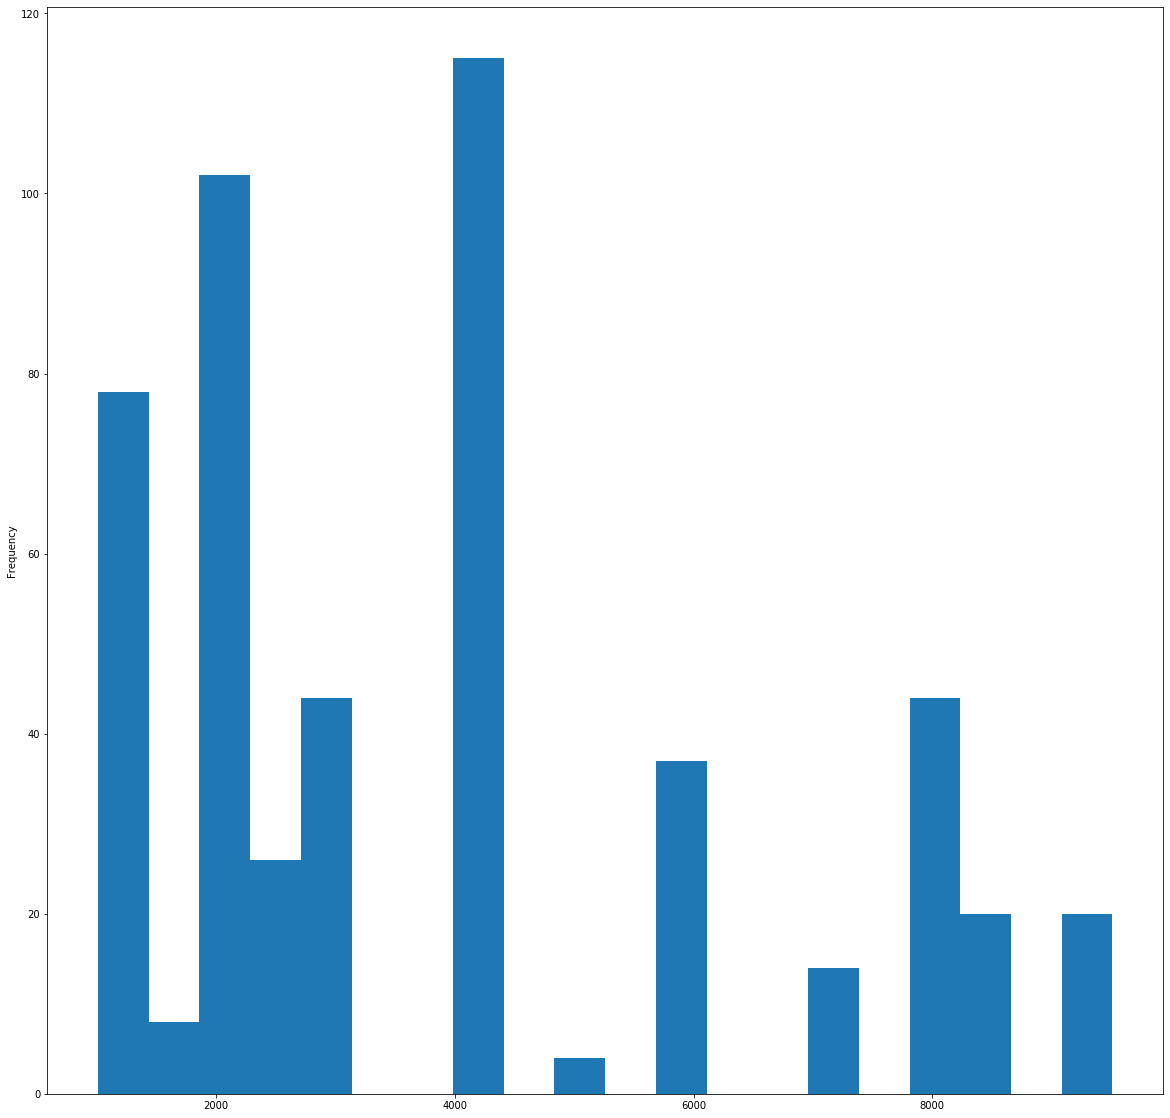

In [46]:
# نكرر العملية مع السهم
data['السهم'].plot.hist(bins=20)

In [5]:
# نستدعي المكتبات المتخصصة بالرسم
import seaborn as sns
import matplotlib.pyplot as plt

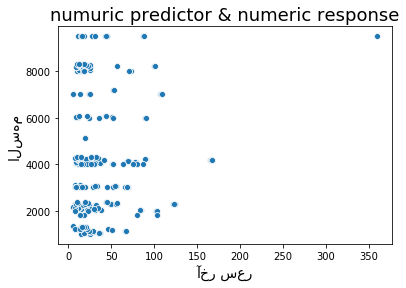

In [6]:
# متغير التنبؤ رقمي و الاستجابة رقمي ====> رسم النقاط
# نرسم باستخدام مكتبة seaborn
sns.scatterplot(x=data['آخر سعر'], y=data['السهم'])
# و نضع تفاصيل الرسم باستخدام مكتبة matplotlib.pyplot
plt.title('numuric predictor & numeric response', fontsize=18)  # عنوان الرسم
plt.xlabel('آخر سعر', fontsize=14)  # اسم المتغير السيني
plt.ylabel('السهم', fontsize=14)  # اسم المتغير الصادي
plt.show()  # إظهار الرسم

In [7]:
data['القطاع'].value_counts()

المواد الأساسية                 124
التأمين                          67
البنوك                           52
إنتاج الأغذية                    47
السلع الرأسمالية                 35
إدارة وتطوير العقارات            26
الخدمات الإستهلاكية              26
تجزئة السلع الكمالية             19
النقل                            16
السلع طويلة الاجل                15
الطاقة                           14
الرعاية الصحية                   13
الإتصالات                        12
الإستثمار والتمويل               11
تجزئة الأغذية                    10
الخدمات التجارية والمهنية         8
الإعلام والترفيه                  7
المرافق العامة                    7
البنوك والخدمات المالية           7
التطبيقات وخدمات التقنية          4
الصناعات                          3
الادوية                           3
البضائع والخدمات الاستهلاكية      3
9.13                              2
9.5                               2
العقارات                          1
15.04                             1
15.3                        

In [8]:
len(data['القطاع'].value_counts())

28

In [9]:
# سنحول القيم في فئة القطاع إلى أرقام لتكون واضحة في الرسم
data['القطاع'] = pd.Categorical(data['القطاع'])
data['القطاع رموز'] = data['القطاع'].cat.codes
len(data['القطاع رموز'].value_counts())

28

In [10]:
data.head()

,Unnamed: 0,الشركة,السهم,القطاع,آخر سعر,نسبة التغيير,آخر تحديث,القطاع رموز
0,0,سامبا,1090.0,البنوك,29.80,-1.16%,05 أغسطس 2019,11
1,1,السعودي الفرنسي,1050.0,البنوك,37.50,-3.47%,05 أغسطس 2019,11
2,2,الأول,1040.0,البنوك,19.58,1.45%,13 يونيو 2019,11
3,3,الجزيرة,1020.0,البنوك,14.74,-2.12%,05 أغسطس 2019,11
4,4,الرياض,1010.0,البنوك,25.05,-1.96%,05 أغسطس 2019,11


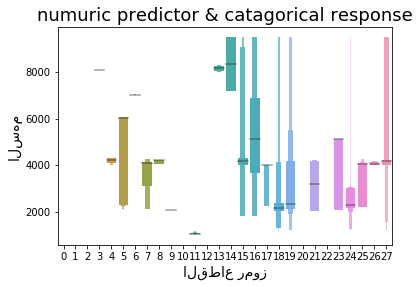

In [11]:
# متغير التنبؤ رقمي و الاستجابة فئوي ===> رسم الصندوق
sns.boxenplot(x=data['القطاع رموز'], y=data['السهم'])
# و نضع تفاصيل الرسم باستخدام مكتبة matplotlib.pyplot
plt.title('numuric predictor & catagorical response', fontsize=18)  # عنوان الرسم
plt.xlabel('القطاع رموز', fontsize=14)  # اسم المتغير السيني
plt.ylabel('السهم', fontsize=14)  # اسم المتغير الصادي
plt.rcParams["figure.figsize"] = (20,30)  # تغيير الحجم
plt.show()  # إظهار الرسم

//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


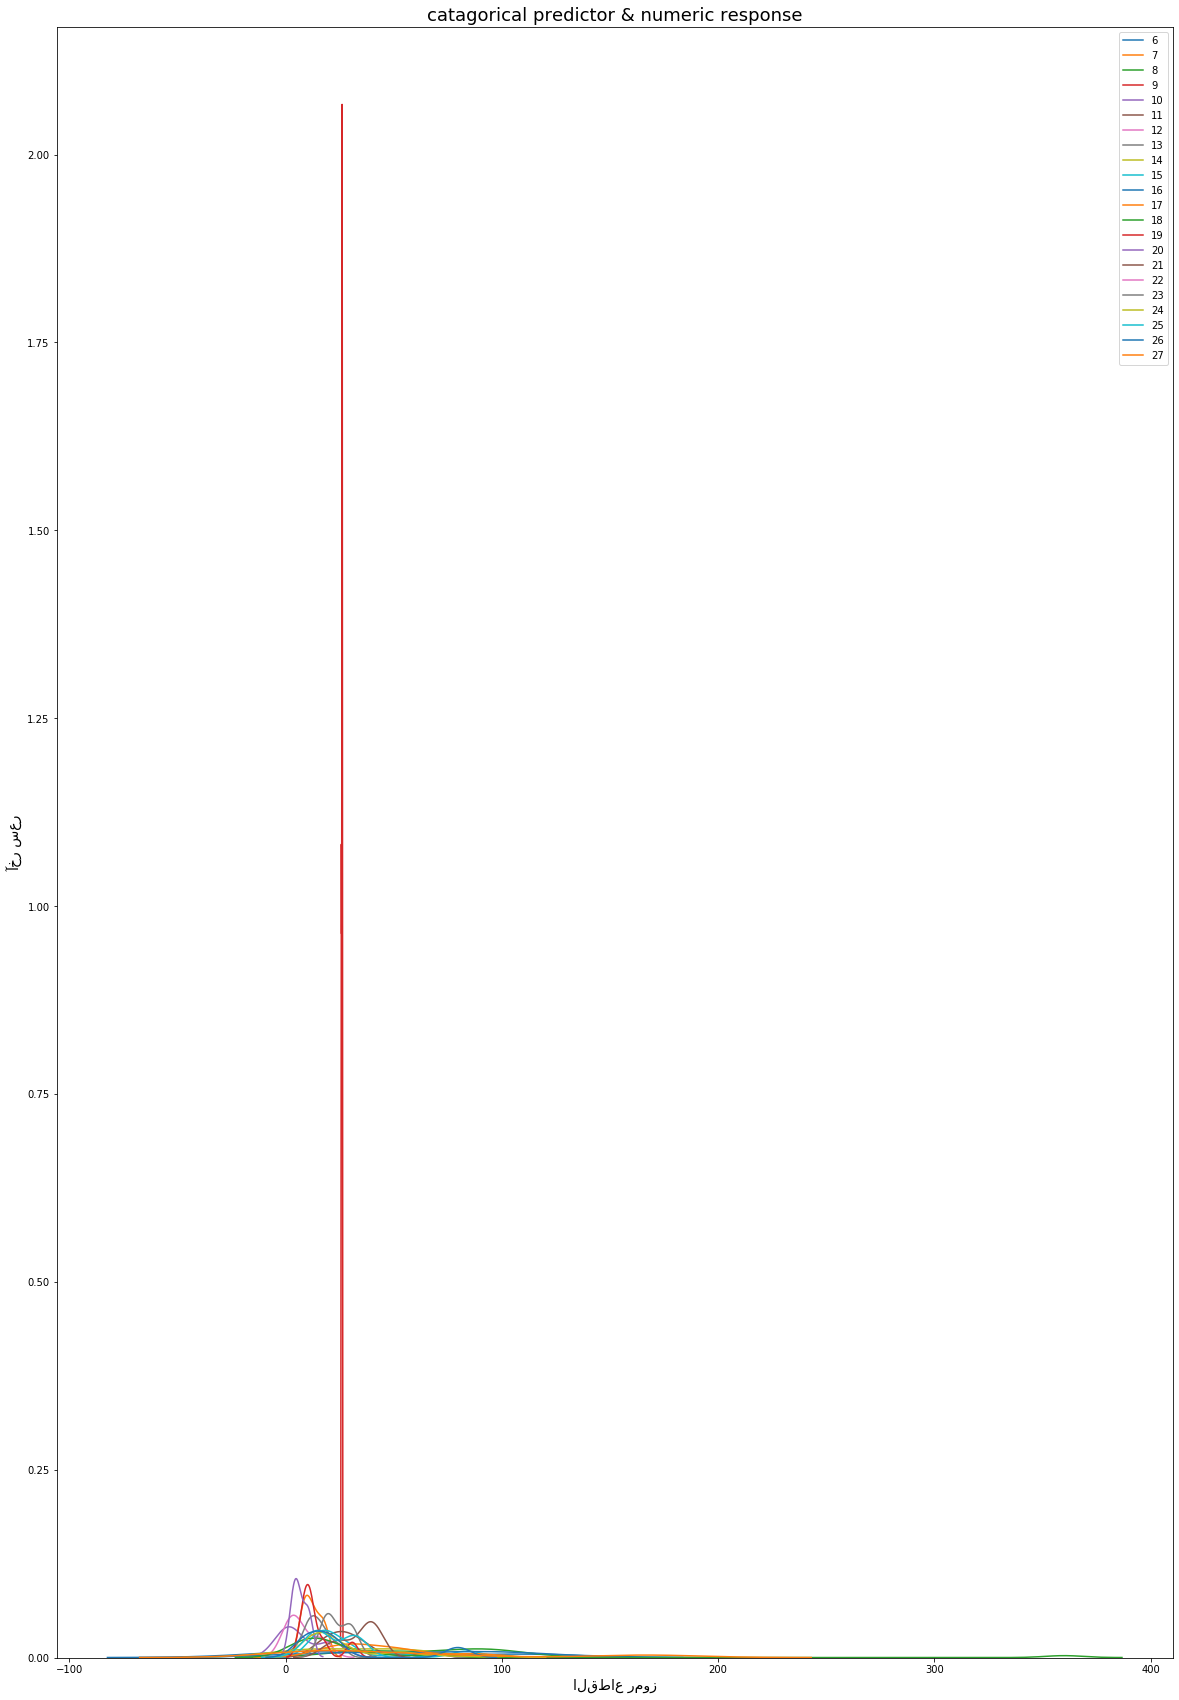

In [12]:
# سنقوم بالعكس لنجرب متغير التنبؤ فئوي و الاستجابة رقمي ===> رسم الكثافة 
for i in range(6, len(data['القطاع رموز'].value_counts())):
    sns.kdeplot(data.loc[data['القطاع رموز']==i, 'آخر سعر'], label=i)
plt.title('catagorical predictor & numeric response', fontsize=18)  # عنوان الرسم
plt.xlabel('القطاع رموز', fontsize=14)  # اسم المتغير السيني
plt.ylabel('آخر سعر', fontsize=14)  # اسم المتغير الصادي
plt.rcParams["figure.figsize"] = (20,90)  # تغيير الحجم
plt.show()

In [1]:
# سنحول القيم في فئة القطاع إلى أرقام لتكون واضحة في الرسم
data['الشركة'] = pd.Categorical(data['الشركة'])
data['الشركة رموز'] = data['الشركة'].cat.codes
len(data['الشركة رموز'].value_counts())

NameError: name 'pd' is not defined

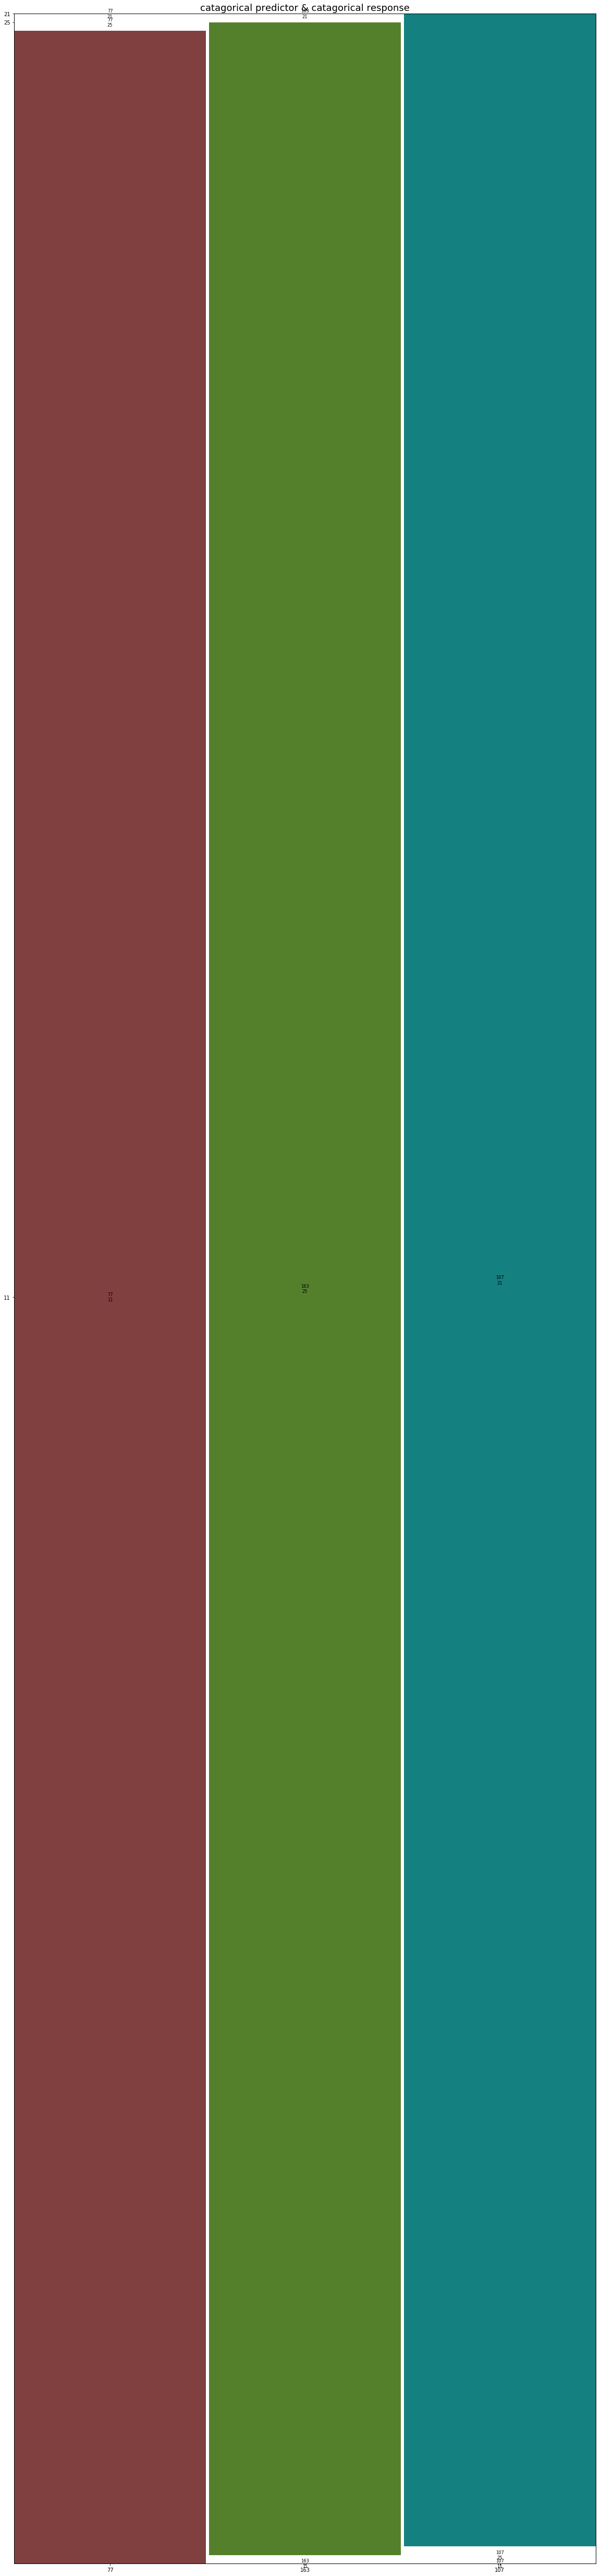

In [14]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data[7:10], ['الشركة رموز', 'القطاع رموز'])
plt.title('catagorical predictor & catagorical response', fontsize=18)  # عنوان الرسم
plt.rcParams["figure.figsize"] = (20,20)  # تغيير الحجم
plt.show()

# تحويل البيانات الفئوية إلى أرقام 

In [15]:
# إذا كانت البيانات تحتوي متغيرًا فئويا، ينبغي علينا تحويله لأرقام لكن ليس بالطريقة السابقة
new_data = pd.get_dummies(data['القطاع'])
data = pd.concat([data, new_data], axis=1)
data.head()

,Unnamed: 0,الشركة,السهم,القطاع,آخر سعر,نسبة التغيير,آخر تحديث,القطاع رموز,الشركة رموز,15.04,...,السلع الرأسمالية,السلع طويلة الاجل,الصناعات,الطاقة,العقارات,المرافق العامة,المواد الأساسية,النقل,تجزئة الأغذية,تجزئة السلع الكمالية
0,0,سامبا,1090.0,البنوك,29.80,-1.16%,05 أغسطس 2019,11,156,0,...,0,0,0,0,0,0,0,0,0,0
1,1,السعودي الفرنسي,1050.0,البنوك,37.50,-3.47%,05 أغسطس 2019,11,80,0,...,0,0,0,0,0,0,0,0,0,0
2,2,الأول,1040.0,البنوك,19.58,1.45%,13 يونيو 2019,11,40,0,...,0,0,0,0,0,0,0,0,0,0
3,3,الجزيرة,1020.0,البنوك,14.74,-2.12%,05 أغسطس 2019,11,62,0,...,0,0,0,0,0,0,0,0,0,0
4,4,الرياض,1010.0,البنوك,25.05,-1.96%,05 أغسطس 2019,11,78,0,...,0,0,0,0,0,0,0,0,0,0


# إعادة صياغة النسبة

In [16]:
# سنعيد صيغة عمود النسبة بحذف رمز النسبة و تحويله لعمود رقمي
data['نسبة التغيير'] = data['نسبة التغيير'].str.replace('\%','')
data['نسبة التغيير'] = pd.to_numeric(data['نسبة التغيير'], errors='coerce')
data.head()

,Unnamed: 0,الشركة,السهم,القطاع,آخر سعر,نسبة التغيير,آخر تحديث,القطاع رموز,الشركة رموز,15.04,...,السلع الرأسمالية,السلع طويلة الاجل,الصناعات,الطاقة,العقارات,المرافق العامة,المواد الأساسية,النقل,تجزئة الأغذية,تجزئة السلع الكمالية
0,0,سامبا,1090.0,البنوك,29.80,-1.16,05 أغسطس 2019,11,156,0,...,0,0,0,0,0,0,0,0,0,0
1,1,السعودي الفرنسي,1050.0,البنوك,37.50,-3.47,05 أغسطس 2019,11,80,0,...,0,0,0,0,0,0,0,0,0,0
2,2,الأول,1040.0,البنوك,19.58,1.45,13 يونيو 2019,11,40,0,...,0,0,0,0,0,0,0,0,0,0
3,3,الجزيرة,1020.0,البنوك,14.74,-2.12,05 أغسطس 2019,11,62,0,...,0,0,0,0,0,0,0,0,0,0
4,4,الرياض,1010.0,البنوك,25.05,-1.96,05 أغسطس 2019,11,78,0,...,0,0,0,0,0,0,0,0,0,0


# تسوية البيانات الرقمية

In [17]:
# سنقوم بتسوية عمود السهم
# سنطلع أولا على قيمة المتوسط و الوسيط
median = data['السهم'].median()
mean = data['السهم'].mean()
std = data['السهم'].std()
print("المتوسط:", mean)
print("الوسيط:", median)
print("الانحراف المعياري:", std)

المتوسط: 3994.556640625
الوسيط: 3090.5
الانحراف المعياري: 2483.3132105471373


In [18]:
# للتسوية نطرح المتوسط من القيمة ثم نقسمها على الانحراف المعياري
data.loc[:, 'السهم'] = (data['السهم']-mean)/std
data.head()

,Unnamed: 0,الشركة,السهم,القطاع,آخر سعر,نسبة التغيير,آخر تحديث,القطاع رموز,الشركة رموز,15.04,...,السلع الرأسمالية,السلع طويلة الاجل,الصناعات,الطاقة,العقارات,المرافق العامة,المواد الأساسية,النقل,تجزئة الأغذية,تجزئة السلع الكمالية
0,0,سامبا,-1.169630,البنوك,29.80,-1.16,05 أغسطس 2019,11,156,0,...,0,0,0,0,0,0,0,0,0,0
1,1,السعودي الفرنسي,-1.185737,البنوك,37.50,-3.47,05 أغسطس 2019,11,80,0,...,0,0,0,0,0,0,0,0,0,0
2,2,الأول,-1.189764,البنوك,19.58,1.45,13 يونيو 2019,11,40,0,...,0,0,0,0,0,0,0,0,0,0
3,3,الجزيرة,-1.197818,البنوك,14.74,-2.12,05 أغسطس 2019,11,62,0,...,0,0,0,0,0,0,0,0,0,0
4,4,الرياض,-1.201845,البنوك,25.05,-1.96,05 أغسطس 2019,11,78,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# لنتفحص المتوسط و الوسيط و الانحراف المعياري
median = data['السهم'].median()
mean = data['السهم'].mean()
std = data['السهم'].std()
print("المتوسط:", mean)
print("الوسيط:", median)
print("الانحراف المعياري:", std)

المتوسط: 1.5395670849294163e-16
الوسيط: -0.3640526039104883
الانحراف المعياري: 0.9999999999999997


# قراءة ملفات إكسل و جيسون

In [20]:
data_excel = pd.read_excel('data.xlsx')
data_excel.head()

,id,age,sex,income
0,1,12,NaN,1200
1,2,40,Male,na
2,3,25,Male,29000
3,4,31,NaN,25000
4,5,AGE,-,36000


In [21]:
pd.read_json('data.json')

,name,job
1,ameera,chef
2,shefaa,artist
